<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [1]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 20.4MB/s]


In [76]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
display(df.head())

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801


## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

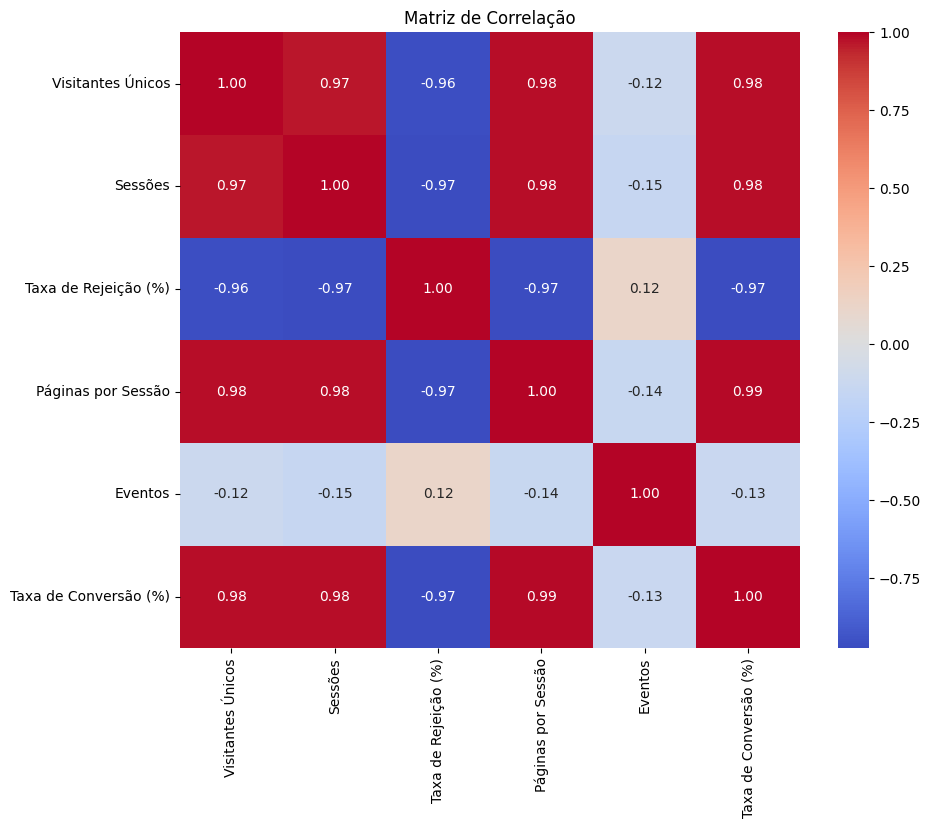

In [27]:
# Convertendo colunas de data em timestamp Unix (segundos desde 1970-01-01)
df_numeric = df.select_dtypes(include=[np.number])

# Calculando a matriz de correlação das colunas numéricas
corr_matrix = df_numeric.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Matriz de Correlação')
plt.show()

In [22]:
import pandas as pd
import plotly.express as px

average_conversion_rate = df.groupby('Visitantes Únicos')['Taxa de Conversão (%)'].mean().reset_index()

fig = px.line(
    average_conversion_rate,
    x='Visitantes Únicos',
    y='Taxa de Conversão (%)',
    markers=True,
    title='Média da Taxa de Conversão por Visitantes Únicos',
    labels={'Visitantes Únicos': 'Visitantes Únicos', 'Taxa de Conversão (%)': 'Média da Taxa de Conversão (%)'}
)

fig.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [50]:
# Parâmetros da simulação
n_simulacoes = 1000
aumento_medio_taxa_conversao = 0.05  # 5% de aumento
desvio_padrao = 0.01  #Considerando um desvio padrão pequeno

# Simulando o efeito do redesign na taxa de conversão
taxa_conversao_atual = df['Taxa de Conversão (%)'].mean()
novas_taxas = np.random.normal(loc=taxa_conversao_atual * (1 + aumento_medio_taxa_conversao),
                               scale=desvio_padrao,
                               size=n_simulacoes)

# Analisando os resultados
print(f'Média estimada da taxa de conversão após o redesign: {novas_taxas.mean():.2f}%')
print(f'Desvio padrão estimado: {novas_taxas.std():.2f}%')
print(f'Intervalo de confiança de 95% para a nova taxa de conversão: {np.percentile(novas_taxas, [2.5, 97.5])}')

Média estimada da taxa de conversão após o redesign: 4.73%
Desvio padrão estimado: 0.01%
Intervalo de confiança de 95% para a nova taxa de conversão: [4.70642312 4.74204318]


In [81]:
# Suponha que df é o DataFrame que contém a 'Rejection Rate'
mean_rejection_rate_pre_change = df.iloc[:30]['Taxa de Conversão (%)'].mean()
mean_rejection_rate_post_change = df.iloc[30:]['Taxa de Conversão (%)'].mean()

# Diferença observada
observed_difference = mean_rejection_rate_post_change - mean_rejection_rate_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Taxa de Conversão (%)'].std()  # Desvio padrão das taxas de rejeição para variabilidade

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_rejection_rate = mean_rejection_rate_pre_change

# Calcular novas taxas de rejeição potenciais
new_rejection_rates = base_rejection_rate + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_rejection_rates)
percentile_5th = np.percentile(new_rejection_rates, 5)
percentile_95th = np.percentile(new_rejection_rates, 95)

# Criar DataFrame para o Plotly
data = pd.DataFrame({
    'New Rejection Rates': new_rejection_rates
})

# Criando o gráfico com Plotly Express
fig = px.histogram(data, x='New Rejection Rates', nbins=50, title='Distribuição Simulada das Novas Taxas de Rejeição')
fig.add_vline(x=average_new_rejection_rate, line_dash="dash", line_color="red", annotation_text="Média")
fig.add_vline(x=percentile_5th, line_dash="dash", line_color="green", annotation_text="5º Percentil")
fig.add_vline(x=percentile_95th, line_dash="dash", line_color="green", annotation_text="95º Percentil")
fig.update_layout(xaxis_title='Taxa de Rejeição (%)', yaxis_title='Frequência')
fig.show()

In [82]:
tempos_visita = df['Tempo Médio de Sessão (minutos)']
tempos_antes = tempos_visita[:29]
tempos_depois = tempos_visita[30:]

# Calculando a média e desvio padrão antes e depois da mudança
media_antes = np.mean(tempos_antes)
desvio_padrao_antes = np.std(tempos_antes, ddof=1)
media_depois = np.mean(tempos_depois)
desvio_padrao_depois = np.std(tempos_depois, ddof=1)

# Impacto estimado da mudança anterior
impacto_estimado = (media_depois - media_antes)/media_antes
print(f'impacto_estimado: {impacto_estimado}')
desvio_padrao = desvio_padrao_depois-desvio_padrao_antes
print(f'desvio padrão: {desvio_padrao}')

impacto_estimado: 0.924774981788126
desvio padrão: 0.14203697487869826


In [83]:
# Usando esse impacto para estimar o efeito de uma nova mudança similar
nova_media = media_antes * (1 + impacto_estimado)
novo_desvio_padrao = desvio_padrao_antes * (1 + impacto_estimado)

# Simulando 1000 cenários de Monte Carlo com os novos parâmetros
simulacoes = np.random.normal(nova_media, novo_desvio_padrao, 1000)

# Calculando os intervalos de confiança de 95%
percentil_2_5 = np.percentile(simulacoes, 2.5)
percentil_97_5 = np.percentile(simulacoes, 97.5)

# Criar DataFrame para o Plotly
data = pd.DataFrame({
    'Simulações': simulacoes
})

# Criando o gráfico com Plotly Express
fig = px.histogram(data, x='Simulações', nbins=30, title='Impacto da Inclusão de um Novo Vídeo no Tempo Médio de Permanência')
fig.add_vline(x=media_antes, line_dash="dash", line_color="red", annotation_text="Média Antes")
fig.add_vline(x=nova_media, line_dash="dash", line_color="green", annotation_text="Projeção da Nova Média")
fig.add_vline(x=percentil_2_5, line_dash="dot", line_color="orange", annotation_text="2.5% Percentil")
fig.add_vline(x=percentil_97_5, line_dash="dot", line_color="orange", annotation_text="97.5% Percentil")
fig.update_layout(xaxis_title='Tempo Médio de Visita (minutos)', yaxis_title='Frequência', legend_title_text='Legenda')
fig.show()

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

   Aumento Médio  Desvio Padrão  Média Estimada  \
0           0.03           0.01        4.634636   
1           0.03           0.02        4.634502   
2           0.03           0.03        4.634686   
3           0.05           0.01        4.724600   
4           0.05           0.02        4.724250   
5           0.05           0.03        4.724234   
6           0.07           0.01        4.814567   
7           0.07           0.02        4.814983   
8           0.07           0.03        4.814390   

   Intervalo de confiança de 95% Baixo  Intervalo de confiança de 95% Alto  
0                             4.614750                            4.654361  
1                             4.594857                            4.673528  
2                             4.574727                            4.693517  
3                             4.704968                            4.744520  
4                             4.685581                            4.763235  
5                          

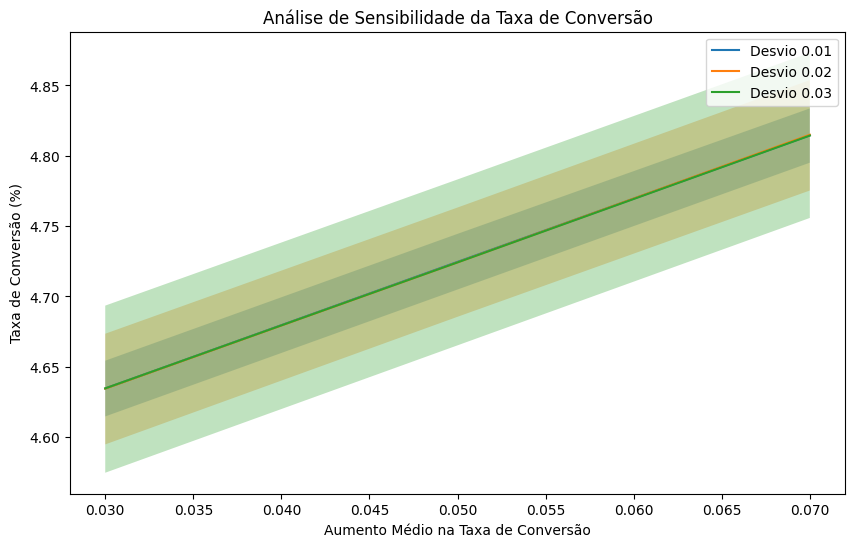

In [84]:
# Parâmetros da simulação
n_simulacoes = 10000
aumentos_medios = [0.03, 0.05, 0.07]
desvios_padrao = [0.01, 0.02, 0.03]

# Resultados armazenados
resultados = []

for aumento in aumentos_medios:
    for desvio in desvios_padrao:
        taxa_conversao_atual = df['Taxa de Conversão (%)'].mean()
        novas_taxas = np.random.normal(loc=taxa_conversao_atual * (1 + aumento),
                                       scale=desvio,
                                       size=n_simulacoes)
        resultados.append({
            'Aumento Médio': aumento,
            'Desvio Padrão': desvio,
            'Média Estimada': novas_taxas.mean(),
            'Intervalo de confiança de 95% Baixo': np.percentile(novas_taxas, 2.5),
            'Intervalo de confiança de 95% Alto': np.percentile(novas_taxas, 97.5)
        })

# Convertendo resultados em DataFrame para melhor visualização
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

fig, ax = plt.subplots(figsize=(10, 6))
for desvio in desvios_padrao:
    subset = resultados_df[resultados_df['Desvio Padrão'] == desvio]
    ax.plot(subset['Aumento Médio'], subset['Média Estimada'], label=f'Desvio {desvio}')
    ax.fill_between(subset['Aumento Médio'], subset['Intervalo de confiança de 95% Baixo'], subset['Intervalo de confiança de 95% Alto'], alpha=0.3)

ax.set_title('Análise de Sensibilidade da Taxa de Conversão')
ax.set_xlabel('Aumento Médio na Taxa de Conversão')
ax.set_ylabel('Taxa de Conversão (%)')
ax.legend()
plt.show()


## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.